# **Задание по стажировке: Статистический анализ данных**

---

## **Загрузка файла и датасета**

In [1]:
!pip install -q openpyxl

In [2]:
import pandas as pd
from numpy import NaN
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import seaborn as sns
import sklearn.linear_model as lm
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
# настройки вывода
pd.options.display.max_rows = 1000
pd.options.display.max_columns = 60

**Загружаем файл в переменную `ds0` и копируем в `ds`**

In [4]:
# загрузка датасета
ds0 = pd.read_excel('vacancies.xlsx')
ds0 = ds0.drop('Unnamed: 0', axis=1)

In [5]:
# загрузка датасета из Excel занимает почти минуту, а создание копии в пандас - секунду
# если что-то пойдёт не так, можно быстро восстановить исходный датасет из ds0, выполнив эту строку
ds = ds0.copy()

## **1. Структурируйте данные**

**(Представьте их, например, в виде таблицы "объект-свойство", где по строкам расположены наблюдения, по столбцам — их характеристики)**

**В нашем датасете с вакансиями наблюдением будет конкретная позиция (строка таблицы). Её характеристики представлены столбцами таблицы: зарплата, график и опыт работы, регион, город, работодатель, сфера деятельности, и т.д.**

**Выведем первые 5 строк датасета:**

In [6]:
ds.head()

,id,name,city,employer,schedule,experience,key_skills,specializations,region,it,min_salary,max_salary
0,49059633,Младший специалист ручного тестирования,Астрахань,Яндекс,Удаленная работа,Нет опыта,NaN,"Информационные технологии, интернет, телеком^Н...",Астраханская область,IT-сфера,NaN,NaN
1,54252278,Пентестер,Астрахань,SearchInform,Полный день,От 3 до 6 лет,SQL^Linux^Информационная безопасность^Работа с...,"Информационные технологии, интернет, телеком",Астраханская область,IT-сфера,NaN,NaN
2,54428119,Асессор-тестировщик,Астрахань,Яндекс,Удаленная работа,Нет опыта,NaN,"Информационные технологии, интернет, телеком",Астраханская область,IT-сфера,NaN,NaN
3,54429041,Тестировщик (асессор),Астрахань,Яндекс,Удаленная работа,Нет опыта,NaN,"Информационные технологии, интернет, телеком",Астраханская область,IT-сфера,NaN,NaN
4,54653519,Тестировщик.Net,Астрахань,МФК Саммит,Полный день,От 1 года до 3 лет,Git^SQL^Тестирование^C#^API,"Информационные технологии, интернет, телеком",Астраханская область,IT-сфера,21750.0,43500.0


## **2. Проанализируйте, какого типа данные представлены в имеющемся наборе (количественные, порядковые, категориальные)**

**Выведем информацию о столбцах датасета:**

In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75933 entries, 0 to 75932
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               75933 non-null  int64  
 1   name             75933 non-null  object 
 2   city             75933 non-null  object 
 3   employer         75933 non-null  object 
 4   schedule         75933 non-null  object 
 5   experience       75933 non-null  object 
 6   key_skills       63265 non-null  object 
 7   specializations  75933 non-null  object 
 8   region           75933 non-null  object 
 9   it               75933 non-null  object 
 10  min_salary       36375 non-null  float64
 11  max_salary       21183 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 7.0+ MB


**Имеем следующие типы данных для датасета `ds`:**
1. **id (ID объявления) - категориальный тип**
2. **name (наименование вакансии) - категориальный тип**
3. **city (город размещения) - категориальный тип**
4. **employer (работодатель) - категориальный тип**
5. **schedule (график работы) - категориальный тип**
6. **experience (опыт работы) - категориальный тип (можно привести к порядковому)**
7. **key_skills (ключевые навыки) - категориальный тип**
8. **specializations (сфера деятельности) - категориальный тип**
9. **region (регион размещения) - категориальный тип**
10. **it (принадлежность к IT-сфере) - категориальный тип**
11. **min_salary (нижний порог зарплаты) - количественный тип**
12. **max_salary (верхний порог зарплаты) - количественный тип**

## **3. Визуализируйте имеющиеся данные в соответствии с их типом**

**Зарплату, как количественный тип данных, визуализируем в виде гистограммы:**

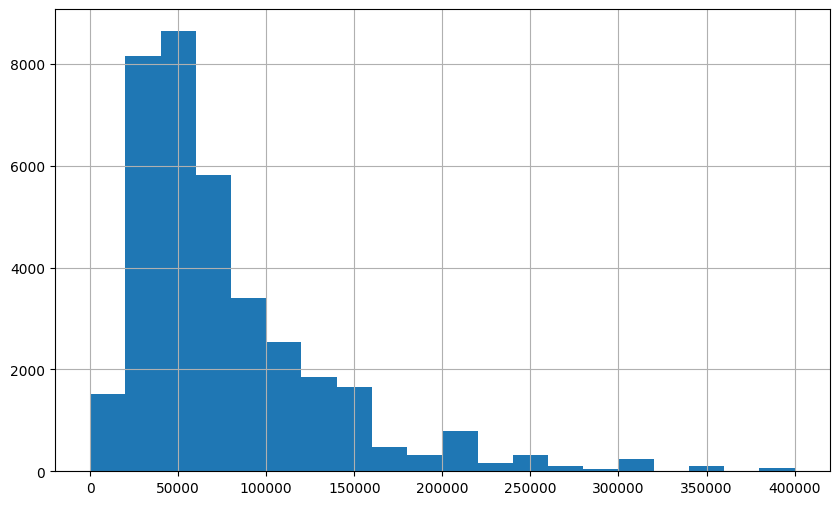

In [8]:
ds['min_salary'].hist(bins=20, range=(0, 400000), figsize=(10, 6))
plt.show()

**Категориальные данные с большим количеством категорий, (такие как Города, Работодатели, Навыки, Названия вакансий и т.п.), удобно представлять в виде столбчатых диаграмм, визуализируя количество вакансий по ним:**

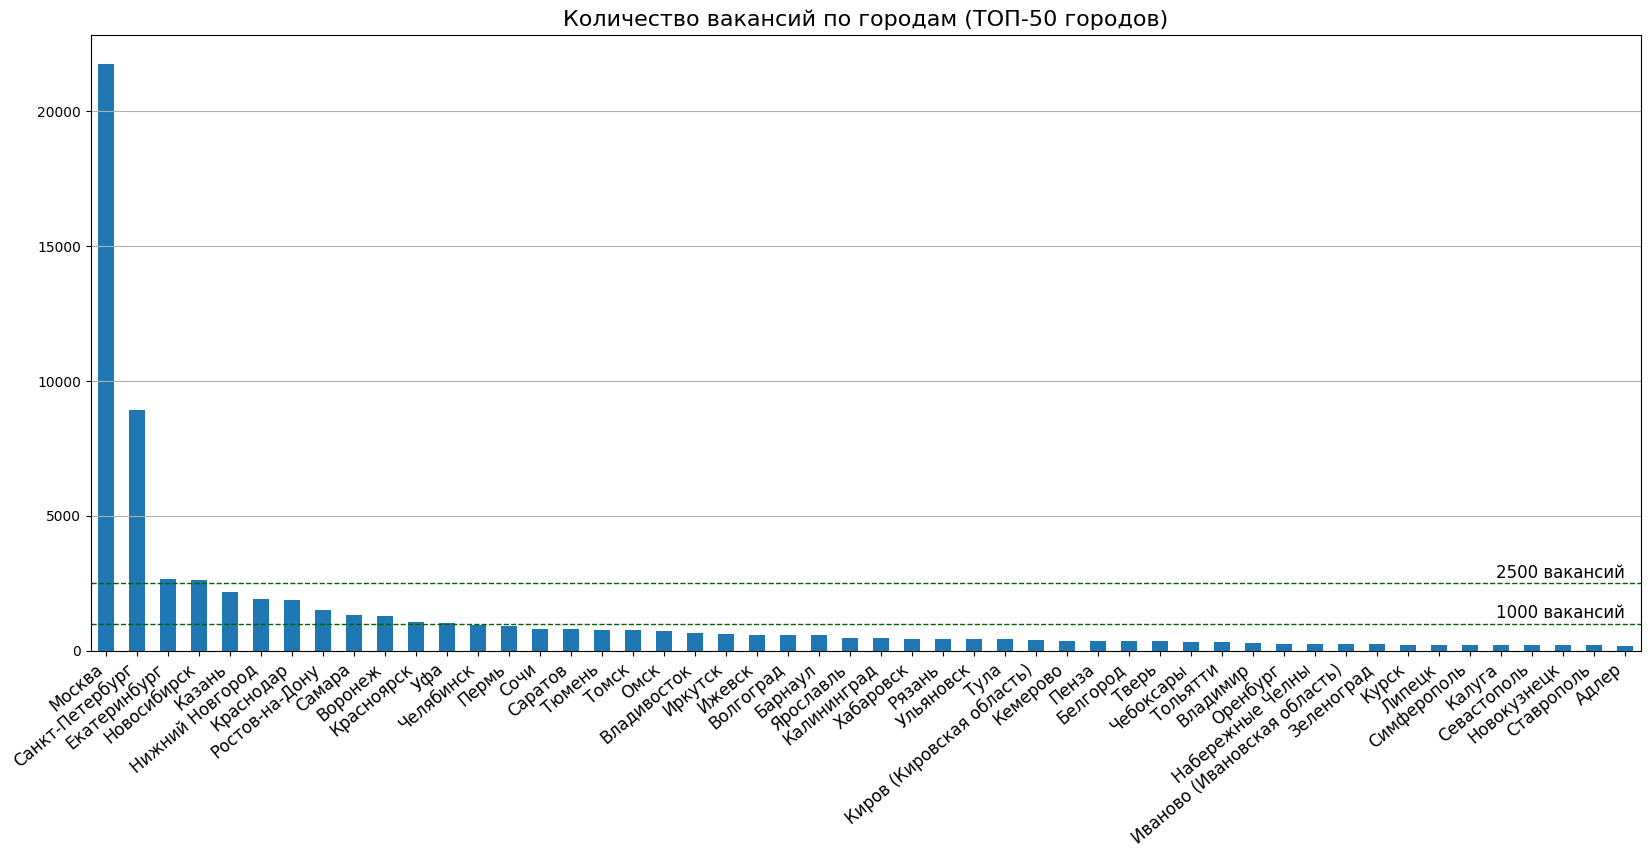

In [9]:
ds['city'].value_counts()[:50].plot(kind='bar', figsize=(20, 8))
plt.title(label = "Количество вакансий по городам (ТОП-50 городов)", fontsize=16)
plt.xticks(fontsize=12, rotation=40, ha='right')
plt.grid(axis='y')
plt.axhline(y=1000, color = 'darkgreen', linestyle='--', linewidth=1)
plt.text(x=49, y=1200,  s='1000 вакансий', size=12, color='black', ha='right')
plt.axhline(y=2500, color = 'darkgreen', linestyle='--', linewidth=1)
plt.text(x=49, y=2700,  s='2500 вакансий', size=12, color='black', ha='right')
plt.show()

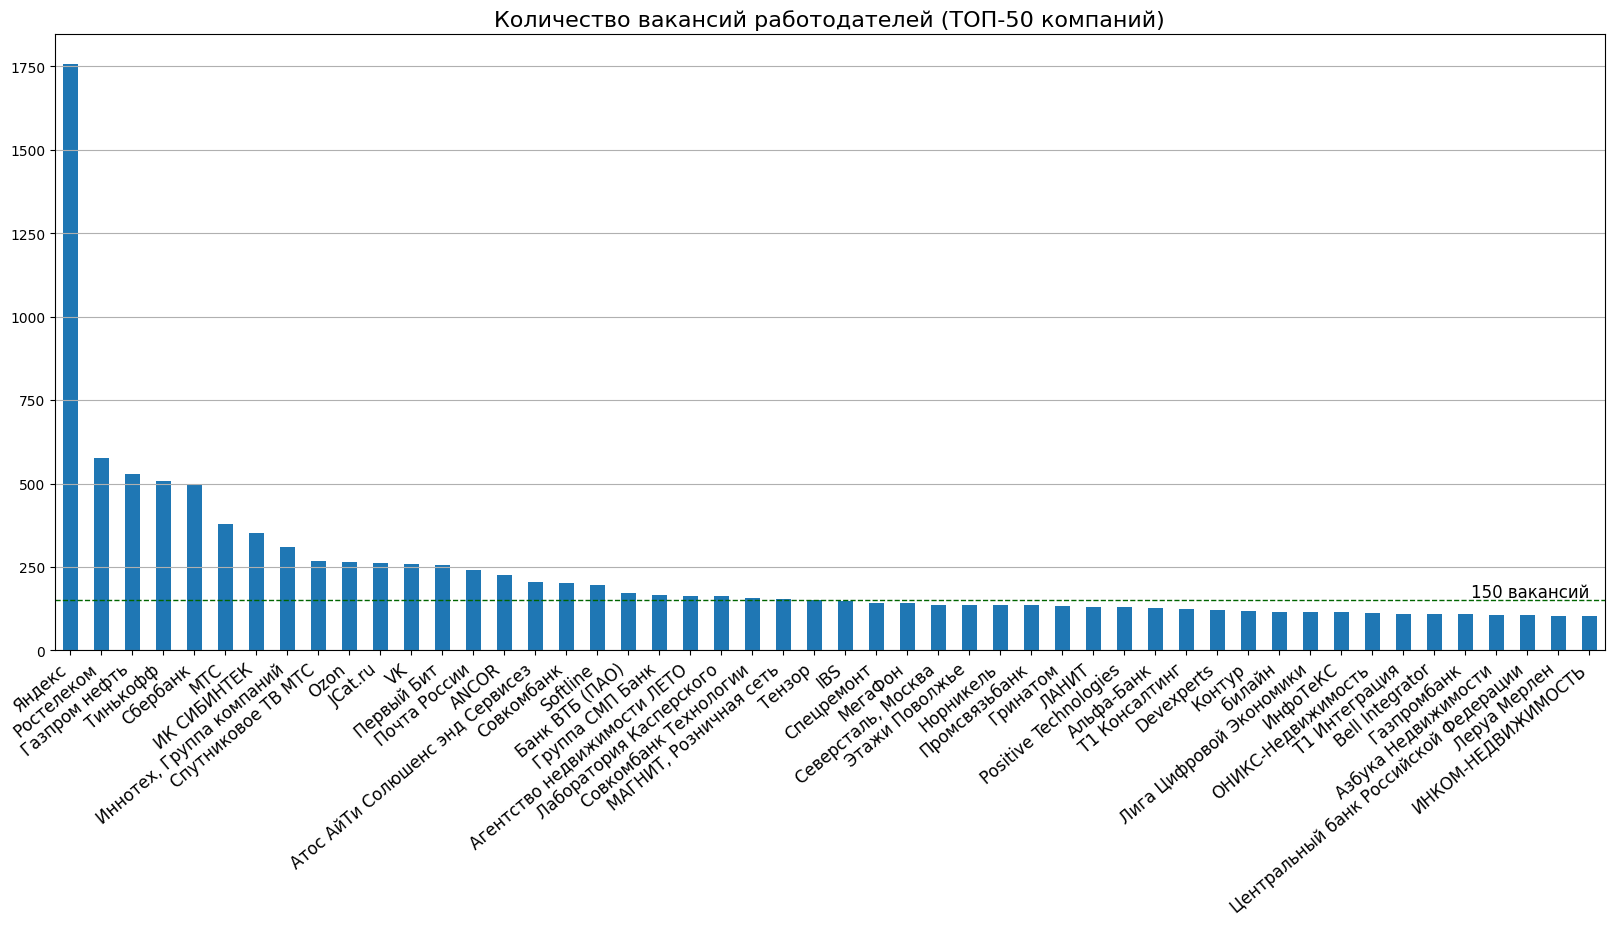

In [10]:
ds['employer'].value_counts()[:50].plot(kind='bar', figsize=(20, 8))
plt.title(label = "Количество вакансий работодателей (ТОП-50 компаний)", fontsize=16)
plt.xticks(fontsize=12, rotation=40, ha='right')
plt.grid(axis='y')
plt.axhline(y=150, color = 'darkgreen', linestyle='--', linewidth=1)
plt.text(x=49, y=160,  s='150 вакансий', size=12, color='black', ha='right')
plt.show()

**Категориальные данные с небольшим количеством категорий, (такие как График работы, Опыт работы), удобно представлять в виде круговых диаграмм. Хотя неплохо будет смотреться и линейчатая диаграмма:**

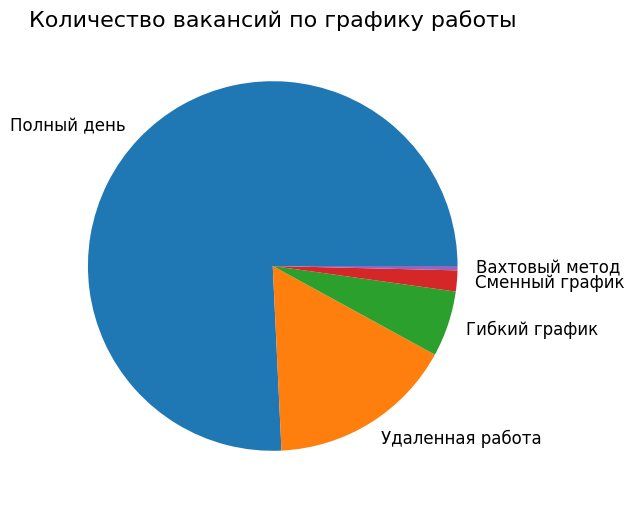

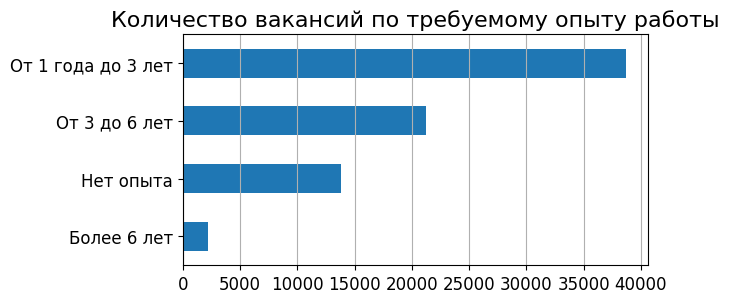

In [11]:
ds['schedule'].value_counts().plot(kind='pie', label='', fontsize = 12, figsize=(6, 6))
plt.title(label = "Количество вакансий по графику работы", fontsize = 16)
plt.show()

ds['experience'].value_counts().sort_values().plot(kind='barh', label='', fontsize = 12, figsize=(6, 3))
plt.grid(axis='x')
plt.title(label = "Количество вакансий по требуемому опыту работы", fontsize = 16)
plt.show()

## **4. Для количественных показателей проверьте гипотезы о виде распределения**

**Проверим гипотезу H0 о том, что значения зарплаты распределены по нормальному закону (проверим и для минимальной, и для максимальной З/П). Рассчитаем для столбцов зарплаты коэффициенты асимметрии и эксцесса, а также проведем тест д'Агостино:**

In [12]:
# коэффициент асимметрии
ds[['min_salary', 'max_salary']].skew()

min_salary    3.007832
max_salary    8.031363
dtype: float64

In [13]:
# коэффициент эксцесса
ds[['min_salary', 'max_salary']].kurtosis()

min_salary     15.811745
max_salary    142.002882
dtype: float64

In [14]:
stats.normaltest(ds['min_salary'], nan_policy='omit')

NormaltestResult(statistic=24404.336300548723, pvalue=0.0)

In [15]:
stats.normaltest(ds['max_salary'], nan_policy='omit')

NormaltestResult(statistic=29794.18052315598, pvalue=0.0)

**Для нормального распределения коэффициент асимметрии должен быть порядка 0 (±1), а коэффициент эксцесса - порядка 3 (±1). Очевидно наши результаты указывают на явные отклонения от нормальности распределения для значений зарплаты. Об этом же говорят результаты тестов д'Агостино - p-уровень значимости близок к нулю, а значит мы уверенно отвергаем нулевую гипотезу.**

**Вывод: Распределение значений и минимальной, и максимальной зарплаты не подчиняется нормальному закону.**

## **5. В зависимости от типов данных, оцените связь между показателями**

Используйте:
- Критерии сравнения групп для анализа связи количественных или порядковых показателей с категориальными
- Анализ таблиц сопряженности для оценки связи двух категориальных признаков
- Корреляционный анализ Пирсона или Спирмена для количественных или порядковых переменных

### **5.1 Критерии сравнения групп для анализа связи количественных или порядковых показателей с категориальными**

**Выясним, влияет ли принадлежность к IT-сфере на размер минимальной зарплаты. Для этого разделим выборку минимальной З/П на две группы (принадлежит к IT-сфере, или нет). Выведем диаграммы размаха для этих групп и средние значения:**

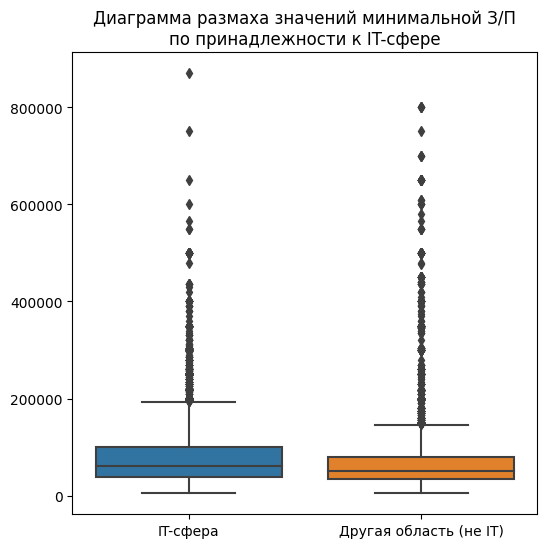


Среднее значение минимальной З/П, сгруппированной по параметру 

it
IT-сфера                  79856.918191
Другая область (не IT)    68520.987667
Name: min_salary, dtype: float64

In [16]:
# удалим пропуски
ds = ds.loc[~(ds['min_salary'].isna())]

plt.subplots(figsize=(6, 6))
sns.boxplot(data=ds, x='it', y='min_salary')
plt.title('Диаграмма размаха значений минимальной З/П\nпо принадлежности к IT-сфере')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

print('\nСреднее значение минимальной З/П, сгруппированной по параметру ', end='')
ds.groupby('it')['min_salary'].mean()

**Мы имеем две независимые группы количественных данных, не подчиняющихся нормальному закону распределения. Для критерия сравнения таких групп уместно выбрать, например, критерий Манна-Уитни. Выведем результаты теста:**

In [17]:
scipy.stats.mannwhitneyu(ds.loc[ds['it'] == "IT-сфера", 'min_salary'], 
                         ds.loc[ds['it'] != "IT-сфера", 'min_salary'])

MannwhitneyuResult(statistic=176710614.5, pvalue=2.0363405588729694e-71)

**Уровень значимости p-value на много порядков ниже 0.05, что позволяет отклонить нулевую гипотезу о том, что принадлежность к IT-сфере не влияет на минимальную З/П. Однако в данных много выбросов. Проверим, как изменится p-value критерия Манна-Утни после очистки данных от выбросов.**

In [18]:
# удалим выбросы в группе IT-сфера
ds.loc[(ds['it'] == "IT-сфера") & (ds['min_salary'] > 200000), 'min_salary'] = None
# удалим выбросы в другой группе (не IT-сфера)
ds.loc[(ds['it'] != "IT-сфера") & (ds['min_salary'] > 125000), 'min_salary'] = None
# удалим пропуски
ds = ds.loc[~(ds['min_salary'].isna())]

**Снова выведем диаграммы размаха, средние значения для групп и результаты критерия сравнения:**

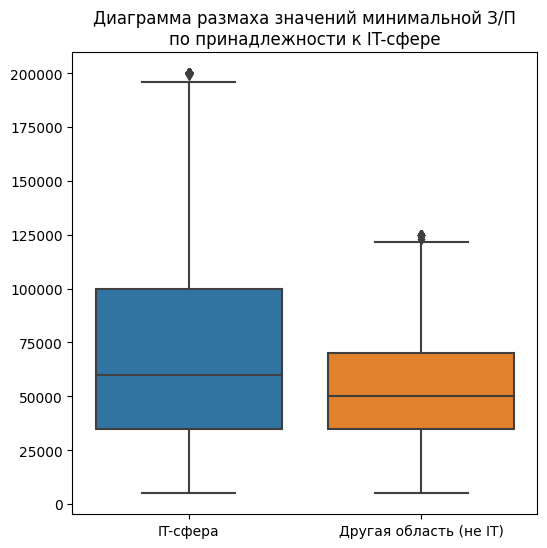


Среднее значение минимальной З/П, сгруппированной по параметру 

it
IT-сфера                  70961.096125
Другая область (не IT)    53734.508161
Name: min_salary, dtype: float64

In [19]:
plt.subplots(figsize=(6, 6))
sns.boxplot(data=ds, x='it', y='min_salary')
plt.title('Диаграмма размаха значений минимальной З/П\nпо принадлежности к IT-сфере')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

print('\nСреднее значение минимальной З/П, сгруппированной по параметру ', end='')
ds.groupby('it')['min_salary'].mean()

In [20]:
scipy.stats.mannwhitneyu(ds.loc[ds['it'] == "IT-сфера", 'min_salary'], 
                         ds.loc[ds['it'] != "IT-сфера", 'min_salary'])

MannwhitneyuResult(statistic=161423883.5, pvalue=5.443603048882728e-159)

**p-уровень значимости стал ещё меньше. Уверенно отвергаем нулевую гипотезу H0.**

**Вывод: Влияние принадлежности к IT-сфере на размер минимальной зарплаты - статистически значимо.**

### **5.2 Анализ таблиц сопряженности для оценки связи двух категориальных признаков**

**Хотим проанализировать связь между такими категориальными признаками, как Принадлежность к IT-сфере и График работы. Построим для наглядности столбчатую диаграмму зависимости количества вакансий от графика работы с разбивкой по принадлежнояти к IT-сфере:**

In [21]:
# восстановили датасет после предыдущего шага
ds = ds0.copy()

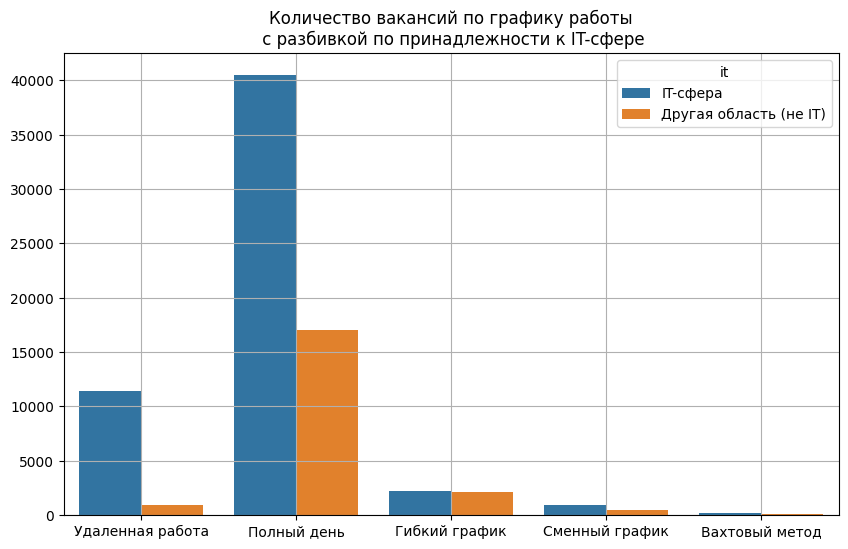

In [22]:
plt.subplots(figsize=(10, 6))
sns.countplot(x=ds['schedule'], hue=ds['it'])
plt.title('Количество вакансий по графику работы\n с разбивкой по принадлежности к IT-сфере')
plt.grid(axis='both')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Выведем таблицу сопряженности для наших категориальных признаков и рассчитаем на ее основе статистику критерия Хи-квадрат и p-уровень значимости:**

In [23]:
itsc = pd.crosstab(ds['it'], ds['schedule'])
itsc

schedule,Вахтовый метод,Гибкий график,Полный день,Сменный график,Удаленная работа
it,,,,,
IT-сфера,170,2244,40465,903,11428
Другая область (не IT),117,2124,17058,490,934


In [24]:
chi2, prob, df, expected = scipy.stats.chi2_contingency(itsc)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
 
print(f'test Statistics: {chi2}\ndegrees of freedom: {df}\np-value: {prob}')

test Statistics: 3660.3179259124486
degrees of freedom: 4
p-value: 0.0


**Полученный уровень значимости p-value близкий к 0 (< 0.05) позволяет отклонить нулевую гипотезу об отсутствии связи между нашими категориальными признаками.**

**Вывод: Обнаружена статистически значимая связь между Графиком работы и Принадлежностью к IT-сфере**

### **5.3 Корреляционный анализ Пирсона или Спирмена для количественных или порядковых переменных**

**Хотим исследовать корреляцию между Минимальной З/П и Опытом работы. При необходимости корреляционного анализа показателей, распределение которых отличается от нормального, в том числе измеренных в порядковой шкале, следует использовать коэффициент ранговой корреляции Спирмена (в нашем случае)**

**Проранжируем переменную `min_salary` (Минимальная З/П) и переведём переменную `experience` (Опыт работы) к порядковому типу:**

In [25]:
# создаем столбец с ранжированной З/П
ds['min_salary_ranked'] = ds['min_salary'].rank()

# функция переводит столбец Опыт работы в порядковый тип данных
def experience_category_to_ordered(experience):
    if experience == 'Нет опыта': return 1
    if experience == 'От 1 года до 3 лет': return 2
    if experience == 'От 3 до 6 лет': return 3
    return 4

# создаем столбец Опыт работы с порядковым типом данных
ds['experience_ordered'] = ds['experience'].apply(experience_category_to_ordered)

# зафиксируем точку сохранения исходного датасета уже с новыми столбцами
ds0 = ds.copy()

# удалим пропуски
ds = ds.loc[~(ds['min_salary_ranked'].isna())]

**Построим диаграмму рассеяния для наглядности. Даже на ней видна взаимосвязь между нашими переменными:**

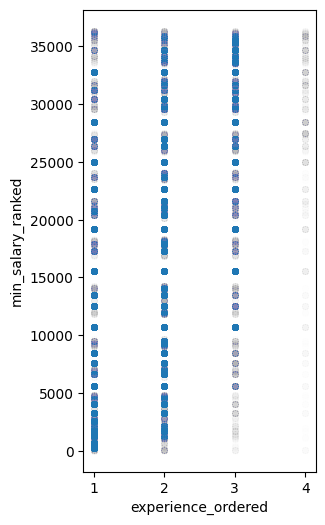

In [26]:
ds.plot(x='experience_ordered', y='min_salary_ranked', kind='scatter', figsize=(3, 6), alpha=0.002)
plt.show()

**Рассчитаем коэффициент корреляции Спирмена и p-уровень значимости:**

In [27]:
coef, p = stats.spearmanr(ds['min_salary_ranked'], ds['experience_ordered'])
print('Spearmans correlation coefficient: %.3f' % coef)
alpha = 0.05
if p > alpha:
    print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: 0.338
Samples are correlated (reject H0) p=0.000


**Уровень значимости <0.05 позволяет отклонить нулевую гипотезу об отсутствии корреляции.**

**Вывод: Обнаружена статистически значимая взаимосвязь между Минимальной З/П и Опытом работы.**

## **6. Проведите сравнение групп (если такая задача имеет смысл). Например, средний уровень заработной платы в зависимости от сферы деятельности и пр.**

**Ранее мы показали наличие взаимосвязи между Минимальной З/П и опытом работы. Проведём сравнение средней Минимальной З/П в группах по Опыту работы:**

In [28]:
salary_by_experience = pd.pivot_table(data=ds, index='experience', values='min_salary', aggfunc='mean')
salary_by_experience = salary_by_experience.sort_values(by='min_salary')
salary_by_experience

,min_salary
experience,
Нет опыта,61140.958151
От 1 года до 3 лет,67908.823124
От 3 до 6 лет,107546.005571
Более 6 лет,136652.854646


**Визуализируем полученный результат в виде линейчатой диаграммы и графика:**

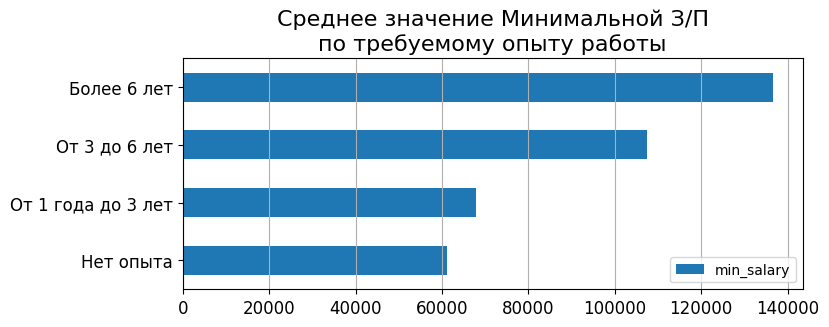

In [29]:
salary_by_experience.plot(kind='barh', label='', fontsize = 12, figsize=(8, 3))
plt.title(label = "Среднее значение Минимальной З/П\nпо требуемому опыту работы", fontsize = 16)
plt.grid(axis='x')
plt.ylabel(None)
plt.show()

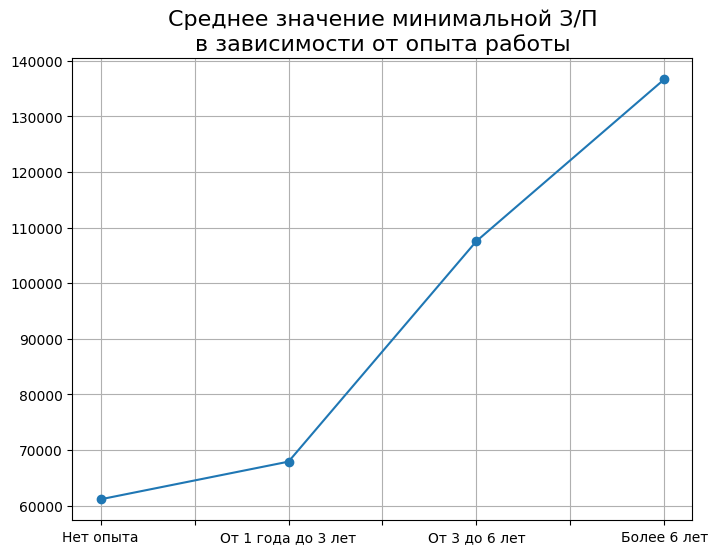

In [30]:
salary_by_experience.plot(figsize=(8, 6), legend=None, style='o-')
plt.title('Среднее значение минимальной З/П\nв зависимости от опыта работы', fontsize=16)
plt.xlabel(None)
plt.grid(True)
plt.show()

**Вывод: Наблюдаем прямую зависимость зарплаты от опыта работы. При отсутствии опыта и при опыте работы 1-3 года средняя зарплата колеблется на значениях 60-70 тысяч рублей и вырастает в полтора-два раза при увеличении опыта работы до 3-6 лет и выше.**

## **7. Сформулируйте минимум одну гипотезу**

Выберете адекватный метод для проверки сформулированного предположения, обоснуйте выбор метода, приложите все графики и расчеты и напишите свое заключение

**ГИПОТЕЗА: Владение навыками SQL статистически значимо повышает уровень зарплаты для IT-специалистов**

### **7.1 Структурированные данные для проверки гипотезы**

**Подготовим датасет `ds1` для проверки гипотезы в виде таблицы "объект-свойство", где по строкам расположены наблюдения, по столбцам — их характеристики). Из первичного датасета нам нужна выборка данных только из IT-сферы, в которой оставим только столбцы с минимальной зарплатой и владением SQL. Выведем первые 5 и последние 5 строк получившегося датасета:**

In [31]:
ds = ds0.copy()

# выборка по IT-сфере
ds = ds.query('it == "IT-сфера"')
# удалим пропуски в зарплатах
ds = ds.loc[~(ds['min_salary'].isna())]
# удалим пропуски в навыках
ds = ds.loc[~(ds['key_skills'].isna())]

# функция принимает строку с ключевыми навыками и возвращает 1, если обнаружен 'SQL', или 0, если не обнаружен
def sql_exist(key_skills):
    if 'SQL' in key_skills: return 'Есть SQL'
    return 'Нет SQL'

ds['sql'] = ds['key_skills'].apply(sql_exist)
ds1 = pd.concat([ds['min_salary'].astype('int'), ds['sql']], axis=1)
ds1

,min_salary,sql
4,21750,Есть SQL
34,52200,Нет SQL
35,26100,Нет SQL
36,22620,Нет SQL
37,17400,Нет SQL
...,...,...
75889,40000,Нет SQL
75892,30450,Нет SQL
75893,30000,Нет SQL
75894,40000,Нет SQL


### **7.2 Тип данных**

**Выведем информацию о столбцах датасета `ds1`:**

In [32]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17574 entries, 4 to 75896
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   min_salary  17574 non-null  int32 
 1   sql         17574 non-null  object
dtypes: int32(1), object(1)
memory usage: 343.2+ KB


**Имеем следующие типы данных для датасета `ds1`:**

1. **min_salary (нижний порог зарплаты) - количественный тип**
2. **sql (владение навыком SQL) - категориальный тип**

### **7.3 Визуализация (табличная и | или графическая)**

**Минимальную зарплату, как количественный тип данных, визуализируем в виде гистограммы:**

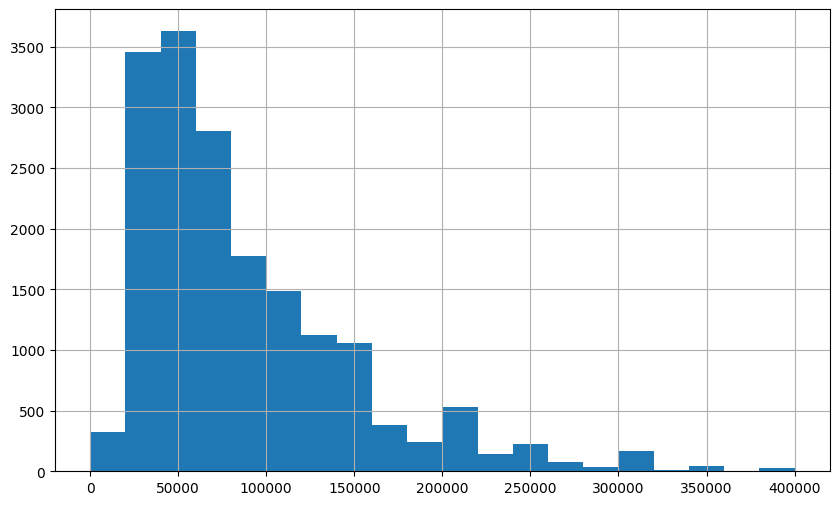

In [33]:
ds1['min_salary'].hist(bins=20, range=(0, 400000), figsize=(10, 6))
plt.show()

**Владение навыком SQL удобно представить в табличной форме и визуализировать в виде круговой диаграммы:**

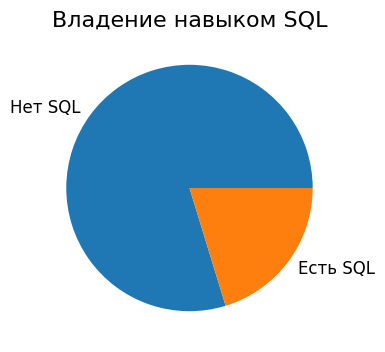

,Кол-во вакансий,%
sql,,
Есть SQL,3561,20.26
Нет SQL,14013,79.74
All,17574,100.00


In [34]:
ds1['sql'].value_counts().plot(kind='pie', label='', fontsize = 12, figsize=(4, 4))
plt.title(label = "Владение навыком SQL", fontsize = 16)
plt.show()

sql_vac = ds1.pivot_table(index='sql', aggfunc='count', margins=True)
sql_vac.columns = ['Кол-во вакансий']
sql_vac['%'] = round(sql_vac['Кол-во вакансий'] * 100 / ds1.shape[0], 2)
display(sql_vac)

### **7.4 Выбранный метод анализа**

**Итак, у нас есть две группы вакансий - с владением навыками SQL и без него. Выведем диаграммы размаха для этих групп:**

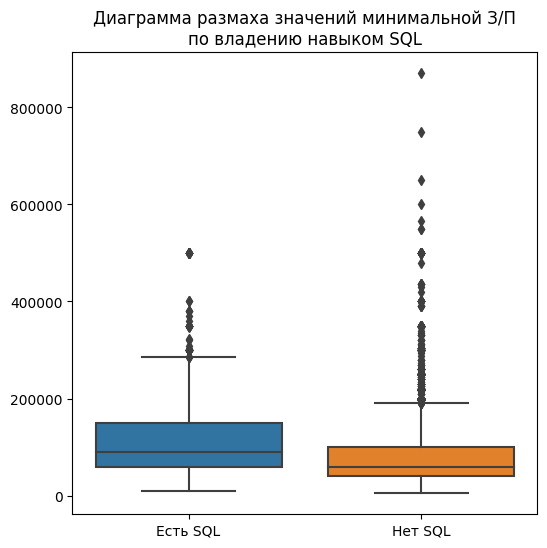

In [35]:
plt.subplots(figsize=(6, 6))
sns.boxplot(data=ds1, x='sql', y='min_salary')
plt.title('Диаграмма размаха значений минимальной З/П\nпо владению навыком SQL')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Удалим выбросы:**

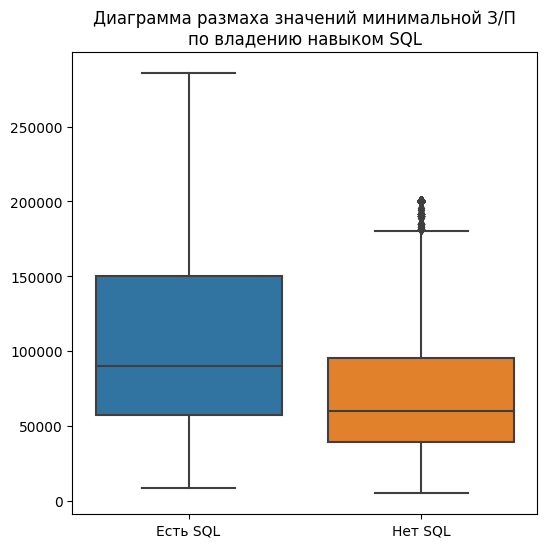

In [36]:
# удалим выбросы в группе владения SQL
ds1.loc[(ds1['sql'] == "Есть SQL") & (ds1['min_salary'] > 290000), 'min_salary'] = None
# удалим выбросы в другой группе (нет SQL)
ds1.loc[(ds1['sql'] != "Есть SQL") & (ds1['min_salary'] > 200000), 'min_salary'] = None
# удалим пропуски
ds1 = ds1.loc[~(ds1['min_salary'].isna())]

plt.subplots(figsize=(6, 6))
sns.boxplot(data=ds1, x='sql', y='min_salary')
plt.title('Диаграмма размаха значений минимальной З/П\nпо владению навыком SQL')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Сравним среднюю минимальную З/П в этих группах:**

In [37]:
sql_salary = ds1.pivot_table(index='sql', values='min_salary', aggfunc='mean')
sql_salary.columns = ['Средняя З/П']
display(sql_salary)


,Средняя З/П
sql,
Есть SQL,105457.455572
Нет SQL,70601.528600


**И по графикам, и по табличным данным видим, что отличия есть (по среднему - более, чем на 30%). Необходимо проверить насколько статистически значимы эти отличия. Мы имеем две независимые группы количественных данных, не подчиняющихся нормальному закону распределения.**

**Для критерия сравнения таких групп уместно выбрать критерий Манна-Уитни.**

### **7.5 Результат реализации метода**

**Нулевая гипотеза метода гласит о том, что отличий средних в группах нет (т.е. владение навыком SQL не оказывает влияния на минимальную З/П). Рассчитаем критерий Манна-Уитни, чтобы проверить данную гипотезу:**

In [38]:
scipy.stats.mannwhitneyu(ds1.loc[ds1['sql'] == "Есть SQL", 'min_salary'], 
                         ds1.loc[ds1['sql'] != "Есть SQL", 'min_salary'])

MannwhitneyuResult(statistic=31534141.0, pvalue=2.023960465565654e-227)

**Уровень значимости p-value гораздо меньше 0.05, что позволяет отвергнуть нулевую гипотезу об отсутствии влияния владения SQL на минимальную З/П**

### **7.6 Вывод**

**Итак, мы выдвинули гипотезу о том, что владение навыками SQL статистически значимо повышает уровень зарплаты для IT-специалистов**

**Для проверки данной гипотезы мы:**

- **Подготовили необходимые данные - датасет с колонками минимальной З/П и владением SQL**
- **Описали типы наших данных - количественные и категориальные соответственно**
- **Визуализировали данные в виде гистограммы, круговой диаграммы и табличной формы**
- **Провели сравнение групп и выбрали критерий для проверки гипотезы - критерий Манна-Уитни**
- **В результате получили подтверждение нашей гипотезы:**

**владение навыками SQL действительно статистически значимо повышает уровень зарплаты для IT-специалистов.**

## **8. Постройте модель связи целевого показателя (при его наличии) в зависимости от факторов**

a)	Выделите целевой показатель (если необходимо).
b)	Определите тип целевого показателя. В зависимости от этого в дальнейшем будет решаться задача регрессии, классификации или, если целевого показателя нет, задача кластеризации.
c)	Постройте модель связи целевого показателя в зависимости от факторов
d)	Попробуйте проинтерпретировать полученную модель

**Рассмотрим в качестве целевого показателя - минимальную З/П IT-специалистов (зависимая переменная). Она имеет количественный непрерывный тип. Поэтому будем строить модель линейной регрессии. В качестве независимых переменных (факторов) рассмотрим опыт работы и график работы. Для начала построим парную регрессионную модель для Опыта работы:**

In [39]:
ds = ds0.copy()

# функция преобразования принадлежности к IT-сфере в бинарный тип
def it_binary(it):
    if it == 'IT-сфера': return 1
    return 0

# добавляем столбец Принадлежности к IT-сфере в бинарном представлении
ds['it_sphere'] = ds['it'].apply(it_binary)
# оставим только IT-выборку
ds = ds.query('it_sphere == 1')
# удалим пропуски
ds = ds.loc[~(ds['min_salary_ranked'].isna())]

In [40]:
X = ds[['experience_ordered']]
Y = ds['min_salary']
LR = lm.LinearRegression()

fit1 = LR.fit(X, Y)
fit1.intercept_, fit1.coef_

(-10111.037597991162, array([42565.23154484]))

In [41]:
r2 = fit1.score(X, Y)
r2

0.23841420532720903

**Коэффициент детерминации очень маленький, значит доля объясненной дисперсии мала, но велика доля остаточной дисперсии. Выведем все результаты модели:**

In [42]:
result1 = smf.ols('min_salary ~ experience_ordered', data=ds).fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             min_salary   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     6798.
Date:                Sat, 02 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:53:49   Log-Likelihood:            -2.6774e+05
No. Observations:               21716   AIC:                         5.355e+05
Df Residuals:                   21714   BIC:                         5.355e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.011e+04   1152.695     -8.772      0.000   -1.24e+04   -7851.670
experience_ordered  4.257e+04    516.272     82.447      0.000    4.16e+04    4.36e+04
==============================================================================
Omnibus:                    11392.039   Durbin-Watson:                   1.419
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           127400.128
Skew:                           2.284   Prob(JB):                         0.00
Kurtosis:                      13.951   Cond. No.                         8.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**И у интерсепта и у обеих переменных p-value имеет значения менее 0.05, а значит отклоняются гипотезы о незначимости данных переменных. Модель статистически значима, но не адекватна из-за не нормального распределения остатков (p-value много меньше 0.05 в критерии Жарка-Берра)**

**Добавим в модель фактор Графика работы в виде фиктивных переменных:**

In [43]:
# функция принимает строку графика работы и возвращает ее номер
def schedule_to_num(schedule):
    if schedule == 'Полный день': return 1
    if schedule == 'Гибкий график': return 2
    if schedule == 'Сменный график': return 3
    if schedule == 'Вахтовый метод': return 4
    return 5

# добавляем столбец с пронумерованным графиком работы
ds['schedule_num'] = ds['schedule'].apply(schedule_to_num)

# создаем дополнительные столбцы - фиктивные переменные Графика работы
ds = pd.concat((ds, pd.get_dummies(ds['schedule_num'], prefix='s', prefix_sep='')), axis=1)

In [44]:
result2 = smf.ols('min_salary ~ experience_ordered + s1 + s2 + s5 + s4', data=ds).fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             min_salary   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     1574.
Date:                Sat, 02 Sep 2023   Prob (F-statistic):               0.00
Time:                        22:53:49   Log-Likelihood:            -2.6734e+05
No. Observations:               21716   AIC:                         5.347e+05
Df Residuals:                   21710   BIC:                         5.347e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -2.963e+04   2482.213    -11.935      0.000   -3.45e+04   -2.48e+04
experience_ordered  4.313e+04    511.288     84.346      0.000    4.21e+04    4.41e+04
s1                  1.298e+04   2380.977      5.451      0.000    8312.956    1.76e+04
s2                  3.606e+04   3015.970     11.955      0.000    3.01e+04     4.2e+04
s5                  3.655e+04   2474.346     14.770      0.000    3.17e+04    4.14e+04
s4                  3.656e+04   6174.486      5.921      0.000    2.45e+04    4.87e+04
==============================================================================
Omnibus:                    11293.572   Durbin-Watson:                   1.450
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           131888.246
Skew:                           2.242   Prob(JB):                         0.00
Kurtosis:                      14.210   Cond. No.                         46.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Коэффициент детерминации незначительно увеличился, но всё равно остаётся низким (0.266). p-value для всех факторов меньше 0.05. Модель по-прежнему статистически значима но неадекватна из-за не нормального распределения остатков. Вероятно, линейная модель не вполне подходит для нашего набора данных**

## **9. Сделайте выводы из полученных результатов**

**Итак, в результате данной работы по статистическому анализу данных:**

1. **Загружены и подготовлены данные в виде таблицы "объект-свойство"**
2. **Проанализированы типы данных**
3. **Визуализированы имеющиеся данные в соответствии с их типом**
4. **Для количественных показателей (зарплата) проверены гипотезы о виде распределения - данные по зарплате не подчиняются нормальному закону распределения**
5. **Был выбран и применён критерий сравнения групп для анализа связи минимальной З/П и принадлежностью к IT-сфере. Критерий Манна-Утни показал, что влияние принадлежности к IT-сфере на размер минимальной З/П статистически значимо**
6. **Проведён анализ таблиц сопряженности для оценки связи двух категориальных признаков - Принадлежности к IT-сфере и Графика работы. Обнаружена статистически значимая связь между Графиком работы и Принадлежностью к IT-сфере**
7. **Исследована корреляцию для количественных или порядковых переменных - между Минимальной З/П и Опытом работы с помощью коэффициента ранговой корреляции Спирмена. Обнаружена статистически значимая взаимосвязь между Минимальной З/П и Опытом работы**
8. **Проведено сравнение групп (средней Минимальной З/П в группах по Опыту работы). Выявлена прямая зависимость зарплаты от опыта работы**
9. **Сформулирована ГИПОТЕЗА: Владение навыками SQL статистически значимо повышает уровень зарплаты для IT-специалистов. Гипотеза проверена методом сравнения групп и при помощи критерия Манна-Уитни. Установлено, что владение навыками SQL действительно статистически значимо повышает уровень зарплаты для IT-специалистов**
10. **Построена регрессионная модель связи целевого показателя (минимальная З/П в сфере IT) в зависимости от Опыта и Графика работы.  Модель оказалась статистически значима но неадекватна из-за не нормального распределения остатков. Вероятно, линейная модель регрессии не вполне подходит для нашего набора данных**
